In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, classification_report
from sklearn.impute import KNNImputer
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


#filter for 2017-2022

In [ ]:
DIR = '/content/drive/MyDrive/Risk_Analysis_DINS/data/'#Maryam
filename = 'dins_all_mv.pkl'

In [ ]:
df = pd.read_pickle(DIR + filename)

In [ ]:
df= df[
    # Keep >= 2017 and Fire hazard type
    (df['INCIDENTSTARTDATE'] >= '2017-01-01')
]

In [ ]:
df.to_csv("dins_2017_2022.csv")

In [ ]:
DIR = '/content/drive/MyDrive/Risk_Analysis_DINS/dins_all/data/'#Maryam

In [ ]:
df=pd.read_csv(DIR+'dins_2017_2022.csv')

In [ ]:
#df=df.drop(['field_1','STREETTYPE','STREETSUFF','CALFIREUNI','COUNTY','BATTALION',
            'INCIDENTNA','INCIDENTNU','INCIDENTST','WHEREFIRES','WHATDIDFIR','DEFENSIVEA',
            'STRUCTURET','STRUCTUREC','NUMBEROFUN','NOOUTBUILD','NOOUTBUI_1','PROPANETAN','UTILITYMIS',
            'APN','ASSESSEDIM','Distance_meter', 'Latitude','Longitude'], axis=1)

In [ ]:
df1 = {
    'DAMAGE': 'DAMAGE',
    'ROOFCONSTR': 'Roof Construction',
    'EAVES': 'Eaves',
    'VENTSCREEN': 'Vent Screen',
    'EXTERIORSI': 'Exterior Siding',
    'WINDOWPANE': 'Window Pane',
    'Distance': 'Distance',
    'DECKPORCHO':'Deck/Porch on Grade',
    'DECKPORCHE': 'Deck/Porch Elevated',
    'PATIOCOVER': 'Patio Cover',
    'FENCEATTAC': 'Fence',
    'YEARBUILT':'YEARBUILT',
}

# Use the rename method to change column names
df.rename(columns=df1, inplace=True)

print(df)

       DAMAGE  Roof Construction  Eaves  Vent Screen  Exterior Siding  \
0         0.0                2.0    2.0          1.0              4.0   
1         1.0                2.0    2.0          1.0              4.0   
2         0.0                2.0    3.0          2.0              4.0   
3         0.0                2.0    2.0          2.0              4.0   
4         0.0                1.0    3.0          2.0              4.0   
...       ...                ...    ...          ...              ...   
87151     0.0                3.0    NaN          NaN              NaN   
87152     NaN                NaN    NaN          NaN              NaN   
87153     0.0                2.0    1.0          4.0              1.0   
87154     0.0                2.0    1.0          4.0              1.0   
87155     0.0                0.0    1.0          4.0              3.0   

       Window Pane  Deck/Porch on Grade  Deck/Porch Elevated  Patio Cover  \
0              1.0                  3.0       

#filter for 2021-2022

In [ ]:
DIR = '/content/drive/MyDrive/Risk_Analysis_DINS/data/'#Maryam
filename = 'dins_all_mv.pkl'

In [ ]:
df = pd.read_pickle(DIR + filename)

In [ ]:
df= df[
    # Keep >= 2021 and Fire hazard type
    (df['INCIDENTSTARTDATE'] >= '2021-01-01')
]

In [ ]:
df.to_csv("dins_2021_2022.csv")

In [ ]:
DIR = '/content/drive/MyDrive/Risk_Analysis_DINS/dins_all/data/'#Maryam

In [ ]:
df=pd.read_csv(DIR+'dins_2021_2022.csv')

In [ ]:
list(df.columns)

['field_1',
 'DAMAGE',
 'STREETTYPE',
 'STREETSUFF',
 'CALFIREUNI',
 'COUNTY',
 'BATTALION',
 'INCIDENTNA',
 'INCIDENTNU',
 'INCIDENTST',
 'WHEREFIRES',
 'WHATDIDFIR',
 'DEFENSIVEA',
 'STRUCTURET',
 'STRUCTUREC',
 'NUMBEROFUN',
 'NOOUTBUILD',
 'NOOUTBUI_1',
 'ROOFCONSTR',
 'EAVES',
 'VENTSCREEN',
 'EXTERIORSI',
 'WINDOWPANE',
 'DECKPORCHO',
 'DECKPORCHE',
 'PATIOCOVER',
 'FENCEATTAC',
 'PROPANETAN',
 'UTILITYMIS',
 'APN',
 'ASSESSEDIM',
 'YEARBUILT',
 'Latitude',
 'Longitude',
 'Distance_meter',
 'Distance']

In [ ]:
df=df.drop(['field_1','STREETTYPE','STREETSUFF','CALFIREUNI','COUNTY','BATTALION',
            'INCIDENTNA','INCIDENTNU','INCIDENTST','WHEREFIRES','WHATDIDFIR','DEFENSIVEA',
            'STRUCTURET','STRUCTUREC','NUMBEROFUN','NOOUTBUILD','NOOUTBUI_1','PROPANETAN','UTILITYMIS',
            'APN','ASSESSEDIM','Distance_meter', 'Latitude','Longitude'], axis=1)

In [ ]:
df1 = {
    'DAMAGE': 'DAMAGE',
    'ROOFCONSTR': 'Roof Construction',
    'EAVES': 'Eaves',
    'VENTSCREEN': 'Vent Screen',
    'EXTERIORSI': 'Exterior Siding',
    'WINDOWPANE': 'Window Pane',
    'Distance': 'Distance',
    'DECKPORCHO':'Deck/Porch on Grade',
    'DECKPORCHE': 'Deck/Porch Elevated',
    'PATIOCOVER': 'Patio Cover',
    'FENCEATTAC': 'Fence',
    'YEARBUILT':'YEARBUILT',
}

# Use the rename method to change column names
df.rename(columns=df1, inplace=True)

print(df)

       DAMAGE  Roof Construction  Eaves  Vent Screen  Exterior Siding  \
0         2.0                2.0    NaN          NaN              1.0   
1         2.0                1.0    NaN          NaN              1.0   
2         2.0                0.0    1.0          NaN              2.0   
3         2.0                4.0    3.0          4.0              0.0   
4         2.0                2.0    NaN          NaN              4.0   
...       ...                ...    ...          ...              ...   
15257     0.0                3.0    NaN          NaN              NaN   
15258     NaN                NaN    NaN          NaN              NaN   
15259     0.0                2.0    1.0          4.0              1.0   
15260     0.0                2.0    1.0          4.0              1.0   
15261     0.0                0.0    1.0          4.0              3.0   

       Window Pane  Deck/Porch on Grade  Deck/Porch Elevated  Patio Cover  \
0              1.0                  0.0       

#filter by year

for 2017

In [ ]:
DIR = '/content/drive/MyDrive/Risk_Analysis_DINS/data/'#Maryam
filename = 'dins_all_mv.pkl'

In [ ]:
df = pd.read_pickle(DIR + filename)

In [ ]:
df = df[
    # Keep dates > 2017-01-01 and < 2017-12-30
    (df['INCIDENTSTARTDATE'] > '2017-01-01') & (df['INCIDENTSTARTDATE'] < '2017-12-30')
]


In [ ]:
df.to_csv("dins_2017.csv")

In [ ]:
DIR = '/content/drive/MyDrive/Risk_Analysis_DINS/dins_all/data/'#Maryam

In [ ]:
df=pd.read_csv(DIR+'dins_2017.csv')

In [ ]:
list(df.columns)

['field_1',
 'DAMAGE',
 'STREETTYPE',
 'STREETSUFF',
 'CALFIREUNI',
 'COUNTY',
 'BATTALION',
 'INCIDENTNA',
 'INCIDENTNU',
 'INCIDENTST',
 'WHEREFIRES',
 'WHATDIDFIR',
 'DEFENSIVEA',
 'STRUCTURET',
 'STRUCTUREC',
 'NUMBEROFUN',
 'NOOUTBUILD',
 'NOOUTBUI_1',
 'ROOFCONSTR',
 'EAVES',
 'VENTSCREEN',
 'EXTERIORSI',
 'WINDOWPANE',
 'DECKPORCHO',
 'DECKPORCHE',
 'PATIOCOVER',
 'FENCEATTAC',
 'PROPANETAN',
 'UTILITYMIS',
 'APN',
 'ASSESSEDIM',
 'YEARBUILT',
 'Latitude',
 'Longitude',
 'distance_meter',
 'Distance']

In [ ]:
df=df.drop(['field_1','STREETTYPE','STREETSUFF','CALFIREUNI','COUNTY','BATTALION',
            'INCIDENTNA','INCIDENTNU','INCIDENTST','WHEREFIRES','WHATDIDFIR','DEFENSIVEA',
            'STRUCTURET','STRUCTUREC','NUMBEROFUN','NOOUTBUILD','NOOUTBUI_1','PROPANETAN','UTILITYMIS',
            'APN','ASSESSEDIM','DECKPORCHO','DECKPORCHE','PATIOCOVER','FENCEATTAC','distance_meter','Latitude','Longitude'], axis=1)

In [ ]:
df1 = {
    'DAMAGE': 'DAMAGE',
    'ROOFCONSTR': 'Roof Construction',
    'EAVES': 'Eaves',
    'VENTSCREEN': 'Vent Screen',
    'EXTERIORSI': 'Exterior Siding',
    'WINDOWPANE': 'Window Pane',
    'Distance': 'Distance',
    'YEARBUILT':'YEARBUILT',
}

# Use the rename method to change column names
df.rename(columns=df1, inplace=True)

print(df)

for 2018

In [ ]:
DIR = '/content/drive/MyDrive/Risk_Analysis_DINS/data/'#Maryam
filename = 'dins_all_mv.pkl'

In [ ]:
df = pd.read_pickle(DIR + filename)

In [ ]:
df = df[
    # Keep dates > 2018-01-01 and < 2018-12-30
    (df['INCIDENTSTARTDATE'] > '2018-01-01') & (df['INCIDENTSTARTDATE'] < '2018-12-30')
]


In [ ]:
df.to_csv("dins_2018.csv")

In [ ]:
DIR = '/content/drive/MyDrive/Risk_Analysis_DINS/dins_all/data/'#Maryam

In [ ]:
df=pd.read_csv(DIR+'dins_2018.csv')

In [ ]:
list(df.columns)

['field_1',
 'DAMAGE',
 'STREETTYPE',
 'STREETSUFF',
 'CALFIREUNI',
 'COUNTY',
 'BATTALION',
 'INCIDENTNA',
 'INCIDENTNU',
 'INCIDENTST',
 'WHEREFIRES',
 'WHATDIDFIR',
 'DEFENSIVEA',
 'STRUCTURET',
 'STRUCTUREC',
 'NUMBEROFUN',
 'NOOUTBUILD',
 'NOOUTBUI_1',
 'ROOFCONSTR',
 'EAVES',
 'VENTSCREEN',
 'EXTERIORSI',
 'WINDOWPANE',
 'DECKPORCHO',
 'DECKPORCHE',
 'PATIOCOVER',
 'FENCEATTAC',
 'PROPANETAN',
 'UTILITYMIS',
 'APN',
 'ASSESSEDIM',
 'YEARBUILT',
 'Latitude',
 'Longitude',
 'Distance_meter',
 'Distance']

In [ ]:
df=df.drop(['field_1','STREETTYPE','STREETSUFF','CALFIREUNI','COUNTY','BATTALION',
            'INCIDENTNA','INCIDENTNU','INCIDENTST','WHEREFIRES','WHATDIDFIR','DEFENSIVEA',
            'STRUCTURET','STRUCTUREC','NUMBEROFUN','NOOUTBUILD','NOOUTBUI_1','PROPANETAN','UTILITYMIS',
            'APN','ASSESSEDIM','Distance_meter','Latitude','Longitude'], axis=1)

In [ ]:
df1 = {
    'DAMAGE': 'DAMAGE',
    'ROOFCONSTR': 'Roof Construction',
    'EAVES': 'Eaves',
    'VENTSCREEN': 'Vent Screen',
    'EXTERIORSI': 'Exterior Siding',
    'WINDOWPANE': 'Window Pane',
    'Distance': 'Distance',
    'DECKPORCHO':'Deck/Porch on Grade',
    'DECKPORCHE': 'Deck/Porch Elevated',
    'PATIOCOVER': 'Patio Cover',
    'FENCEATTAC': 'Fence',
    'YEARBUILT':'YEARBUILT',
}

# Use the rename method to change column names
df.rename(columns=df1, inplace=True)

print(df)

for 2019

In [ ]:
DIR = '/content/drive/MyDrive/Risk_Analysis_DINS/data/'#Maryam
filename = 'dins_all_mv.pkl'

In [ ]:
df = pd.read_pickle(DIR + filename)

In [ ]:
df = df[
    # Keep dates > 2019-01-01 and < 2019-12-30
    (df['INCIDENTSTARTDATE'] > '2019-01-01') & (df['INCIDENTSTARTDATE'] < '2019-12-30')
]

In [ ]:
df.to_csv("dins_2019.csv")

In [ ]:
DIR = '/content/drive/MyDrive/Risk_Analysis_DINS/dins_all/data/'#Maryam

In [ ]:
df=pd.read_csv(DIR+'dins_2019.csv')

In [ ]:
list(df.columns)

['field_1',
 'DAMAGE',
 'STREETTYPE',
 'STREETSUFF',
 'CALFIREUNI',
 'COUNTY',
 'BATTALION',
 'INCIDENTNA',
 'INCIDENTNU',
 'INCIDENTST',
 'WHEREFIRES',
 'WHATDIDFIR',
 'DEFENSIVEA',
 'STRUCTURET',
 'STRUCTUREC',
 'NUMBEROFUN',
 'NOOUTBUILD',
 'NOOUTBUI_1',
 'ROOFCONSTR',
 'EAVES',
 'VENTSCREEN',
 'EXTERIORSI',
 'WINDOWPANE',
 'DECKPORCHO',
 'DECKPORCHE',
 'PATIOCOVER',
 'FENCEATTAC',
 'PROPANETAN',
 'UTILITYMIS',
 'APN',
 'ASSESSEDIM',
 'YEARBUILT',
 'Latitude',
 'Longitude',
 'Distance_meter',
 'Distance']

In [ ]:
df=df.drop(['field_1','STREETTYPE','STREETSUFF','CALFIREUNI','COUNTY','BATTALION',
            'INCIDENTNA','INCIDENTNU','INCIDENTST','WHEREFIRES','WHATDIDFIR','DEFENSIVEA',
            'STRUCTURET','STRUCTUREC','NUMBEROFUN','NOOUTBUILD','NOOUTBUI_1','PROPANETAN','UTILITYMIS',
            'APN','ASSESSEDIM','Distance_meter','Latitude','Longitude'], axis=1)

In [ ]:
df1 = {
    'DAMAGE': 'DAMAGE',
    'ROOFCONSTR': 'Roof Construction',
    'EAVES': 'Eaves',
    'VENTSCREEN': 'Vent Screen',
    'EXTERIORSI': 'Exterior Siding',
    'WINDOWPANE': 'Window Pane',
    'Distance': 'Distance',
    'DECKPORCHO':'Deck/Porch on Grade',
    'DECKPORCHE': 'Deck/Porch Elevated',
    'PATIOCOVER': 'Patio Cover',
    'FENCEATTAC': 'Fence',
    'YEARBUILT':'YEARBUILT',
}

# Use the rename method to change column names
df.rename(columns=df1, inplace=True)

print(df)

for 2020

In [ ]:
DIR = '/content/drive/MyDrive/Risk_Analysis_DINS/data/'#Maryam
filename = 'dins_all_mv.pkl'

In [ ]:
df = pd.read_pickle(DIR + filename)

In [ ]:
df = df[
    # Keep dates > 2020-01-01 and < 2020-12-30
    (df['INCIDENTSTARTDATE'] > '2020-01-01') & (df['INCIDENTSTARTDATE'] < '2020-12-30')
]

In [ ]:
df.to_csv("dins_2020.csv")

In [ ]:
DIR = '/content/drive/MyDrive/Risk_Analysis_DINS/dins_all/data/'#Maryam

In [ ]:
df=pd.read_csv(DIR+'dins_2020.csv')

In [ ]:
list(df.columns)

['field_1',
 'DAMAGE',
 'STREETTYPE',
 'STREETSUFF',
 'CALFIREUNI',
 'COUNTY',
 'BATTALION',
 'INCIDENTNA',
 'INCIDENTNU',
 'INCIDENTST',
 'WHEREFIRES',
 'WHATDIDFIR',
 'DEFENSIVEA',
 'STRUCTURET',
 'STRUCTUREC',
 'NUMBEROFUN',
 'NOOUTBUILD',
 'NOOUTBUI_1',
 'ROOFCONSTR',
 'EAVES',
 'VENTSCREEN',
 'EXTERIORSI',
 'WINDOWPANE',
 'DECKPORCHO',
 'DECKPORCHE',
 'PATIOCOVER',
 'FENCEATTAC',
 'PROPANETAN',
 'UTILITYMIS',
 'APN',
 'ASSESSEDIM',
 'YEARBUILT',
 'Latitude',
 'Longitude',
 'Distance_meter',
 'Distance']

In [ ]:
df=df.drop(['field_1','STREETTYPE','STREETSUFF','CALFIREUNI','COUNTY','BATTALION',
            'INCIDENTNA','INCIDENTNU','INCIDENTST','WHEREFIRES','WHATDIDFIR','DEFENSIVEA',
            'STRUCTURET','STRUCTUREC','NUMBEROFUN','NOOUTBUILD','NOOUTBUI_1','PROPANETAN','UTILITYMIS',
            'APN','ASSESSEDIM','Distance_meter','Latitude','Longitude'], axis=1)

In [ ]:
df1 = {
    'DAMAGE': 'DAMAGE',
    'ROOFCONSTR': 'Roof Construction',
    'EAVES': 'Eaves',
    'VENTSCREEN': 'Vent Screen',
    'EXTERIORSI': 'Exterior Siding',
    'WINDOWPANE': 'Window Pane',
    'Distance': 'Distance',
    'DECKPORCHO':'Deck/Porch on Grade',
    'DECKPORCHE': 'Deck/Porch Elevated',
    'PATIOCOVER': 'Patio Cover',
    'FENCEATTAC': 'Fence',
    'YEARBUILT':'YEARBUILT',
}

# Use the rename method to change column names
df.rename(columns=df1, inplace=True)

print(df)

       DAMAGE  Roof Construction  Eaves  Vent Screen  Exterior Siding  \
0         0.0                2.0    2.0          1.0              4.0   
1         1.0                2.0    2.0          1.0              4.0   
2         0.0                2.0    3.0          2.0              4.0   
3         0.0                2.0    2.0          2.0              4.0   
4         0.0                1.0    3.0          2.0              4.0   
...       ...                ...    ...          ...              ...   
28621     0.0                2.0    2.0          2.0              4.0   
28622     0.0                2.0    2.0          2.0              1.0   
28623     0.0                2.0    2.0          2.0              1.0   
28624     0.0                2.0    2.0          4.0              4.0   
28625     0.0                2.0    2.0          4.0              4.0   

       Window Pane  Deck/Porch on Grade  Deck/Porch Elevated  Patio Cover  \
0              1.0                  3.0       

2021

In [ ]:
DIR = '/content/drive/MyDrive/Risk_Analysis_DINS/dins_all/data/'#Maryam

In [ ]:
df=pd.read_csv(DIR+'dins_2021.csv')

In [ ]:
list(df.columns)

['field_1',
 'DAMAGE',
 'STREETTYPE',
 'STREETSUFF',
 'CALFIREUNI',
 'COUNTY',
 'BATTALION',
 'INCIDENTNA',
 'INCIDENTNU',
 'INCIDENTST',
 'WHEREFIRES',
 'WHATDIDFIR',
 'DEFENSIVEA',
 'STRUCTURET',
 'STRUCTUREC',
 'NUMBEROFUN',
 'NOOUTBUILD',
 'NOOUTBUI_1',
 'ROOFCONSTR',
 'EAVES',
 'VENTSCREEN',
 'EXTERIORSI',
 'WINDOWPANE',
 'DECKPORCHO',
 'DECKPORCHE',
 'PATIOCOVER',
 'FENCEATTAC',
 'PROPANETAN',
 'UTILITYMIS',
 'APN',
 'ASSESSEDIM',
 'YEARBUILT',
 'Latitude',
 'Longitude',
 'Distance_meter',
 'Distance']

In [ ]:
df=df.drop(['field_1','STREETTYPE','STREETSUFF','CALFIREUNI','COUNTY','BATTALION',
            'INCIDENTNA','INCIDENTNU','INCIDENTST','WHEREFIRES','WHATDIDFIR','DEFENSIVEA',
            'STRUCTURET','STRUCTUREC','NUMBEROFUN','NOOUTBUILD','NOOUTBUI_1','PROPANETAN','UTILITYMIS',
            'APN','ASSESSEDIM','Distance_meter', 'Latitude','Longitude'], axis=1)

In [ ]:
df1 = {
    'DAMAGE': 'DAMAGE',
    'ROOFCONSTR': 'Roof Construction',
    'EAVES': 'Eaves',
    'VENTSCREEN': 'Vent Screen',
    'EXTERIORSI': 'Exterior Siding',
    'WINDOWPANE': 'Window Pane',
    'Distance': 'Distance',
    'DECKPORCHO':'Deck/Porch on Grade',
    'DECKPORCHE': 'Deck/Porch Elevated',
    'PATIOCOVER': 'Patio Cover',
    'FENCEATTAC': 'Fence',
    'YEARBUILT':'YEARBUILT',
}

# Use the rename method to change column names
df.rename(columns=df1, inplace=True)

print(df)

       DAMAGE  Roof Construction  Eaves  Vent Screen  Exterior Siding  \
0      2.0000             2.0000    NaN          NaN           1.0000   
1      2.0000             1.0000    NaN          NaN           1.0000   
2      2.0000             0.0000 1.0000          NaN           2.0000   
3      2.0000             4.0000 3.0000       4.0000           0.0000   
4      2.0000             2.0000    NaN          NaN           4.0000   
...       ...                ...    ...          ...              ...   
12248  0.0000             2.0000 1.0000       4.0000           2.0000   
12249  0.0000             2.0000 1.0000       4.0000           2.0000   
12250  0.0000             0.0000 2.0000       4.0000           4.0000   
12251  2.0000             2.0000    NaN          NaN           4.0000   
12252  2.0000             0.0000    NaN          NaN           2.0000   

       Window Pane  Deck/Porch on Grade  Deck/Porch Elevated  Patio Cover  \
0           1.0000               0.0000       

2022

In [ ]:
DIR = '/content/drive/MyDrive/Risk_Analysis_DINS/dins_all/data/'#Maryam

In [ ]:
df=pd.read_csv(DIR+'dins_2022.csv')

In [ ]:
list(df.columns)

['field_1',
 'DAMAGE',
 'STREETTYPE',
 'STREETSUFF',
 'CALFIREUNI',
 'COUNTY',
 'BATTALION',
 'INCIDENTNA',
 'INCIDENTNU',
 'INCIDENTST',
 'WHEREFIRES',
 'WHATDIDFIR',
 'DEFENSIVEA',
 'STRUCTURET',
 'STRUCTUREC',
 'NUMBEROFUN',
 'NOOUTBUILD',
 'NOOUTBUI_1',
 'ROOFCONSTR',
 'EAVES',
 'VENTSCREEN',
 'EXTERIORSI',
 'WINDOWPANE',
 'DECKPORCHO',
 'DECKPORCHE',
 'PATIOCOVER',
 'FENCEATTAC',
 'PROPANETAN',
 'UTILITYMIS',
 'APN',
 'ASSESSEDIM',
 'YEARBUILT',
 'Latitude',
 'Longitude',
 'Distance_meter',
 'Distance']

In [ ]:
df=df.drop(['field_1','STREETTYPE','STREETSUFF','CALFIREUNI','COUNTY','BATTALION',
            'INCIDENTNA','INCIDENTNU','INCIDENTST','WHEREFIRES','WHATDIDFIR','DEFENSIVEA',
            'STRUCTURET','STRUCTUREC','NUMBEROFUN','NOOUTBUILD','NOOUTBUI_1','PROPANETAN','UTILITYMIS',
            'APN','ASSESSEDIM','Distance_meter','Latitude','Longitude'], axis=1)

In [ ]:
df1 = {
    'DAMAGE': 'DAMAGE',
    'ROOFCONSTR': 'Roof Construction',
    'EAVES': 'Eaves',
    'VENTSCREEN': 'Vent Screen',
    'EXTERIORSI': 'Exterior Siding',
    'WINDOWPANE': 'Window Pane',
    'Distance': 'Distance',
    'DECKPORCHO':'Deck/Porch on Grade',
    'DECKPORCHE': 'Deck/Porch Elevated',
    'PATIOCOVER': 'Patio Cover',
    'FENCEATTAC': 'Fence',
}

# Use the rename method to change column names
df.rename(columns=df1, inplace=True)

print(df)

#Correlation Matrix

In [ ]:
corr_matrix = df.corr()

In [ ]:
corr_matrix

,DAMAGE,Roof Construction,Eaves,Vent Screen,Exterior Siding,Window Pane,Deck/Porch on Grade,Deck/Porch Elevated,Patio Cover,Fence,YEARBUILT,Distance
DAMAGE,1.000000,0.028641,-0.077913,-0.196150,-0.113117,-0.026511,-0.080477,-0.111663,-0.005869,-0.062503,-0.104098,-0.000180
Roof Construction,0.028641,1.000000,0.111953,-0.025925,0.181089,0.076465,0.037933,0.024116,0.052340,0.106084,0.010398,-0.017829
Eaves,-0.077913,0.111953,1.000000,-0.331058,0.078961,0.275855,0.111712,0.152476,0.118826,0.111218,0.055718,-0.024793
Vent Screen,-0.196150,-0.025925,-0.331058,1.000000,0.058371,-0.408831,-0.147273,-0.136370,-0.130880,-0.147374,-0.082805,0.017241
Exterior Siding,-0.113117,0.181089,0.078961,0.058371,1.000000,-0.060333,0.100893,0.134197,0.054572,-0.037848,-0.077650,-0.007984
Window Pane,-0.026511,0.076465,0.275855,-0.408831,-0.060333,1.000000,0.201593,0.206360,0.172148,0.154503,0.124727,-0.013173
Deck/Porch on Grade,-0.080477,0.037933,0.111712,-0.147273,0.100893,0.201593,1.000000,0.211961,0.190235,0.039664,0.032610,0.003326
Deck/Porch Elevated,-0.111663,0.024116,0.152476,-0.136370,0.134197,0.206360,0.211961,1.000000,0.221624,0.068809,0.020620,0.003007
Patio Cover,-0.005869,0.052340,0.118826,-0.130880,0.054572,0.172148,0.190235,0.221624,1.000000,0.102274,-0.011018,-0.009522
Fence,-0.062503,0.106084,0.111218,-0.147374,-0.037848,0.154503,0.039664,0.068809,0.102274,1.000000,0.074846,-0.019437


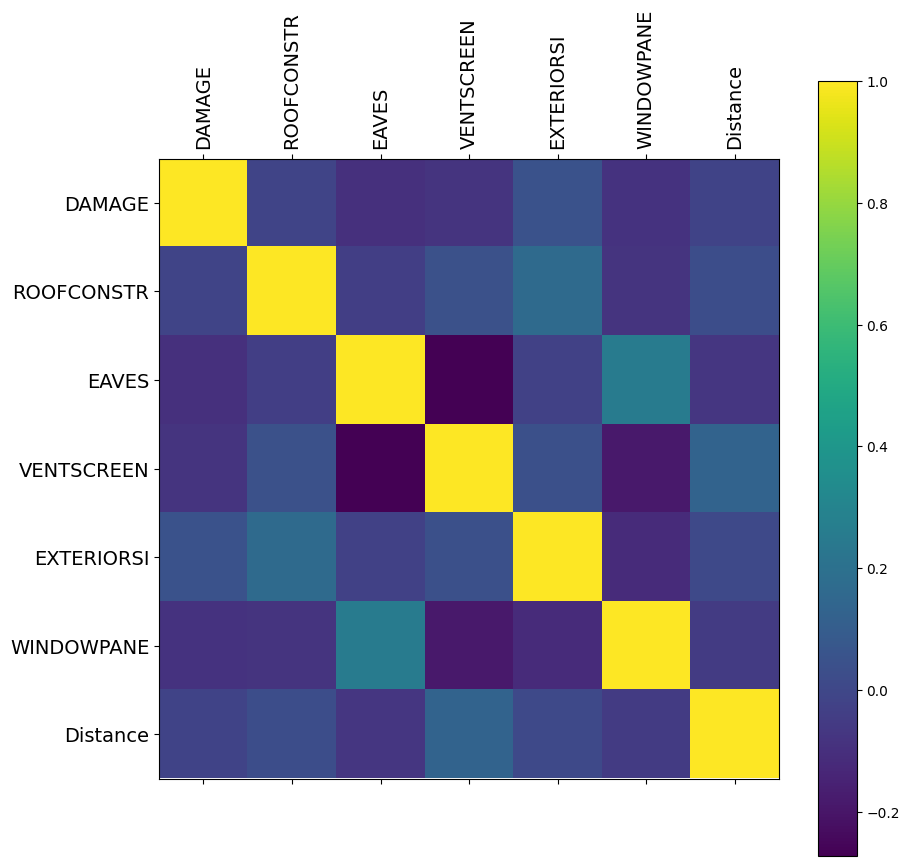

In [ ]:
cols = corr_matrix.columns
plt.figure(figsize=(10, 10),)
plt.matshow(corr_matrix, fignum=1)
plt.xticks(range(len(cols)), cols, rotation='vertical', fontsize=14)
plt.yticks(range(len(cols)), cols, fontsize=14)
plt.colorbar()
plt.show()

In [ ]:
#np.sort(df['INCIDENTNAME'].unique())

array(['46th', 'Aborn', 'Agua', 'Alamo', 'Alisal', 'Antelope', 'Anzar',
       'Apple', 'Argyle', 'Atlas', 'August Complex', 'Avila',
       'BEU Lightning Cmplx', 'Bart', 'Bear', 'Beckwourth', 'Black',
       'Blue Ridge', 'Bobcat', 'Boles', 'Bond', 'Border 32', 'Branch',
       'Broiler', 'Brownell', 'Butte', 'CZU Lightning Cmplx', 'Cache',
       'Caldor', 'Calgary', 'Cameron', 'Camp', 'Canyon', 'Canyon 2',
       'Carder', 'Carr', 'Cascade', 'Cathedral', 'Cherokee', 'Chimney',
       'Clayton', 'Clover', 'Coastal', 'Cocos', 'Colorado', 'Colusa',
       'County', 'Coyote ', 'Cranston', 'Creek', 'Creekside', 'Crews',
       'Delta', 'Dersch ', 'Detwiler', 'Dixie', 'Dorvel', 'Dutcher',
       'El Dorado', 'Emerald', 'Erskine', 'Estate', 'Fairview', 'Fawn',
       'Fay', 'Fiddletown', 'Flats', 'Foothill', 'Fork', 'Frazier',
       'French', 'Garza', 'Getty', 'Glass', 'Glen', 'Gold', 'Goose',
       'Grade', 'Graham', 'Grant', 'Helena', 'High', 'Hill', 'Hog',
       'Holiday', 'Holy', '

In [ ]:
#df= df[
    # Keep >= 2017 and Fire hazard type
    #(df['INCIDENTSTARTDATE'] >= '2017-01-01')
#]

#Feature Importance with Standard Scaling

In [ ]:
DIR = '/content/drive/MyDrive/Risk_Analysis_DINS/dins_all/data/'

In [ ]:
path_to_file = DIR + 'df.csv'

In [ ]:
df = pd.read_csv(path_to_file)

In [ ]:
list(df.columns)

['Damage',
 'RoofConstruction',
 'Eaves',
 'VentScreen',
 'ExteriorSiding',
 'WindowPane',
 'Deck/PorchOnGrade',
 'Deck/PorchElevated',
 'PatioCover',
 'Fence',
 'Distance']

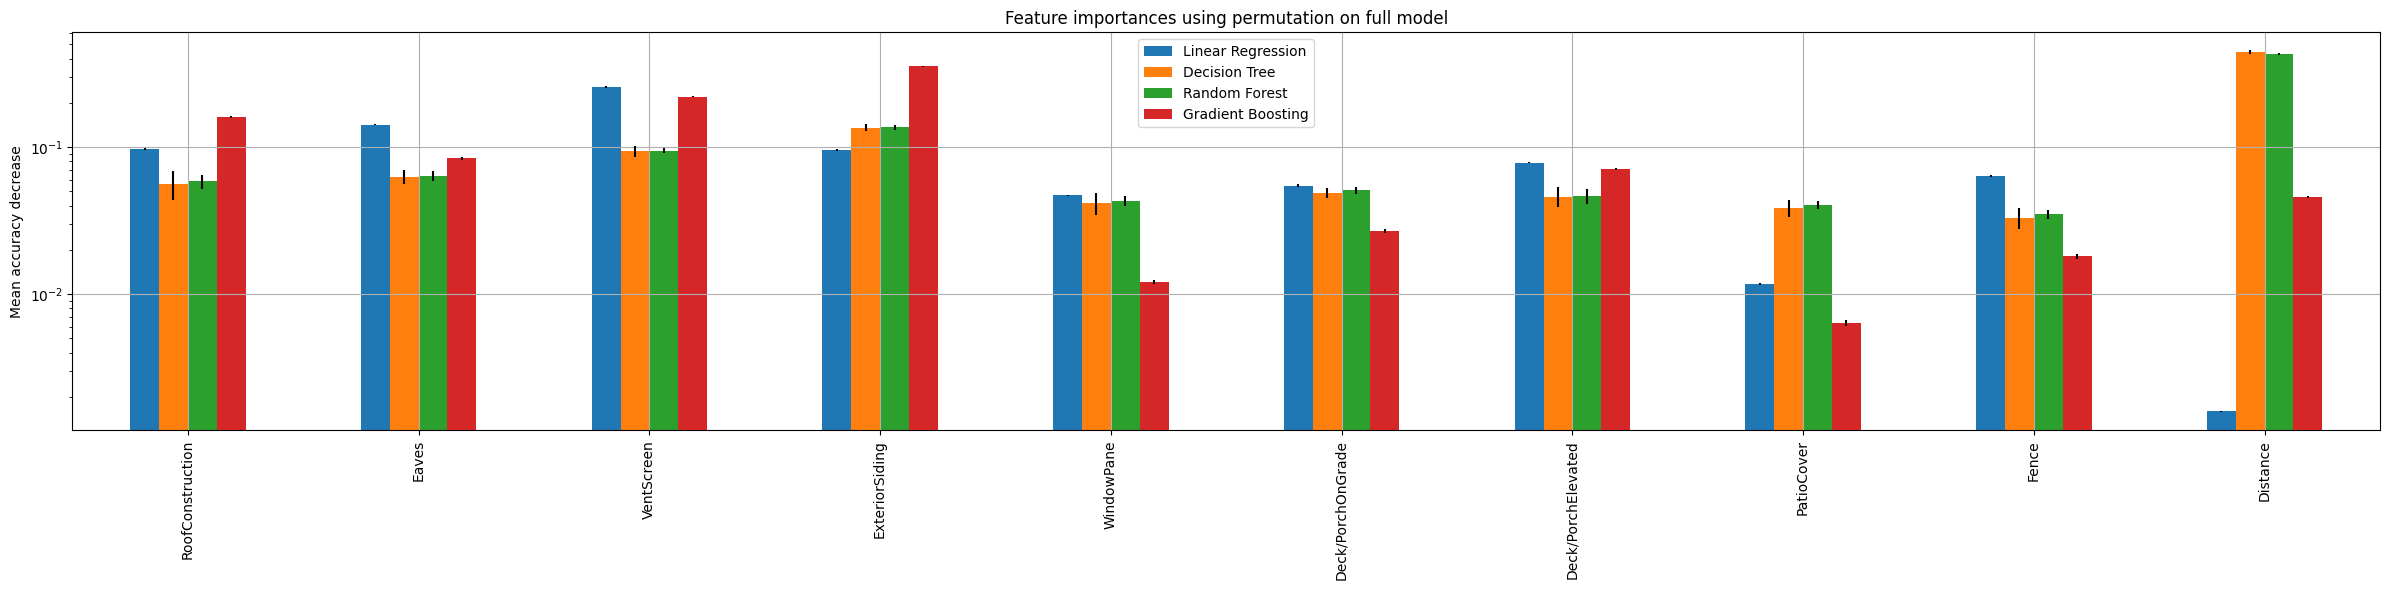

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Data imputation
imputer = KNNImputer(n_neighbors=1)
imp_X = imputer.fit_transform(df)
df_X_imp = pd.DataFrame(imp_X, columns=df.columns)

# Data splitting
X = df_X_imp.drop('Damage', axis=1)
y = df_X_imp['Damage']
columns = X.columns

# Apply standard scaling to input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=666)

# Model training and getting importance scores
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
importance_lr = model_lr.coef_
lr_pi = permutation_importance(model_lr, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
lr_pi_importances = pd.Series(lr_pi.importances_mean, index=columns)

model_dt = DecisionTreeRegressor(random_state=666)
model_dt.fit(X_train, y_train)
importance_dt = model_dt.feature_importances_
dt_pi = permutation_importance(model_dt, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
dt_pi_importances = pd.Series(dt_pi.importances_mean, index=columns)

model_rf = RandomForestRegressor(random_state=666)
model_rf.fit(X_train, y_train)
importance_rf = model_rf.feature_importances_
rf_pi = permutation_importance(model_rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
rf_pi_importances = pd.Series(rf_pi.importances_mean, index=columns)

model_gb = GradientBoostingRegressor(random_state=666)
model_gb.fit(X_train, y_train)
importance_gb = model_gb.feature_importances_
gb_pi = permutation_importance(model_gb, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
gb_pi_importances = pd.Series(gb_pi.importances_mean, index=columns)

# Collating data
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
data = [
    np.abs(importance_lr),
    importance_dt,
    importance_rf,
    importance_gb
]
feature_summary = pd.DataFrame(data, columns=columns, index=models)

pd.set_option('display.float_format', '{:0.4f}'.format)

fi_std = [
    lr_pi.importances_std,
    dt_pi.importances_std,
    rf_pi.importances_std,
    gb_pi.importances_std
]

tmp = pd.DataFrame(fi_std, index=models, columns=feature_summary.columns)
fi_mean = feature_summary.T
fi_std = tmp.T

# Plotting
fig, ax = plt.subplots(figsize=(24, 6))
fi_mean.plot.bar(yerr=fi_std, ax=ax, logy=True, grid=True)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [ ]:
pd.DataFrame(fi_mean.mean(axis=1).sort_values(ascending=False), columns=['Mean'])

,Mean
Distance,0.2302
ExteriorSiding,0.1806
VentScreen,0.1664
RoofConstruction,0.0931
Eaves,0.0883
Deck/PorchElevated,0.0605
Deck/PorchOnGrade,0.0454
Fence,0.0375
WindowPane,0.0359
PatioCover,0.0243


#SHAP Summary Plot without SD

In [ ]:
!pip install shap

In [ ]:
import shap

# Replace numeric labels with meaningful labels
class_labels = {0: "Not Damaged", 1: "Damaged", 2: "Destroyed"}
y_test_labels = y_test.map(class_labels)

# Convert the 'DAMAGE' column to integer type
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Fit the Random Forest model
model_rf = RandomForestClassifier(random_state=666)
model_rf.fit(X_train, y_train)

# Calculate SHAP values using TreeExplainer
explainer_rf = shap.TreeExplainer(model_rf)
shap_values_rf = explainer_rf.shap_values(X_test)

# Combine SHAP values for all classes in one summary plot
shap.summary_plot(shap_values_rf, X_test, class_names=list(class_labels.values()))


#SHAP with SD

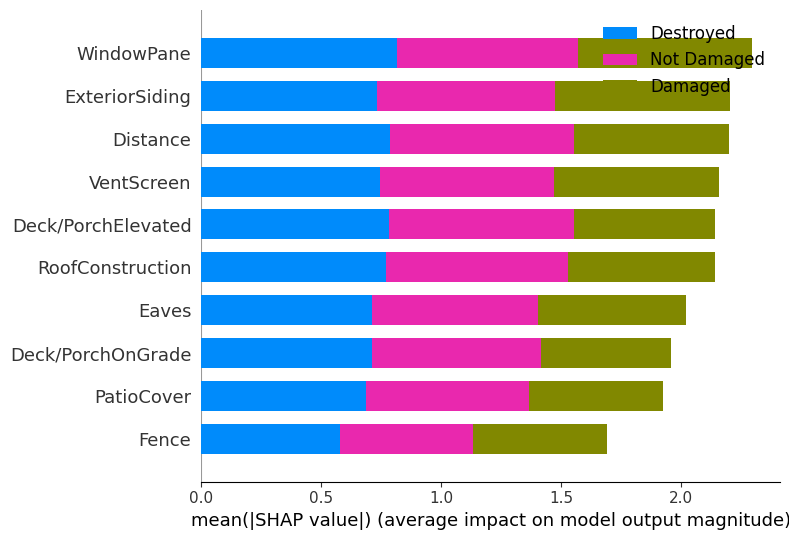

In [ ]:
import shap
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data imputation
imputer = KNNImputer(n_neighbors=1)
imp_X = imputer.fit_transform(df)
df_X_imp = pd.DataFrame(imp_X, columns=df.columns)

# Data splitting
X = df_X_imp.drop('Damage', axis=1)
y = df_X_imp['Damage']
columns = X.columns

# Apply standard scaling to input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Replace this part with your actual data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Replace numeric labels with meaningful labels
class_labels = {0: "Not Damaged", 1: "Damaged", 2: "Destroyed"}
y_test_labels = y_test.map(class_labels)

# Fit the Random Forest model
model_rf = RandomForestClassifier(random_state=666)
model_rf.fit(X_train, y_train)

# Calculate SHAP values using TreeExplainer
explainer_rf = shap.TreeExplainer(model_rf)
shap_values_rf = explainer_rf.shap_values(X_test)

# Normalize SHAP values by the standard deviation
shap_values_rf_normalized = [shap_values_rf_class / shap_values_rf_class.std(axis=0)
                              for shap_values_rf_class in shap_values_rf]

# Combine SHAP values for all classes in one summary plot with consistent coloring
shap.summary_plot(shap_values_rf_normalized, X_test, class_names=list(class_labels.values()))



#Joint PDF

In [ ]:
df

,Damage,RoofConstruction,Eaves,VentScreen,ExteriorSiding,WindowPane,Deck/PorchOnGrade,Deck/PorchElevated,PatioCover,Fence,Distance
0,0.0,0.0,3.0,1.0,4.0,2.0,3.0,3.0,2.0,0.0,1146.794386
1,0.0,0.0,2.0,4.0,0.0,1.0,3.0,3.0,0.0,1.0,212.707148
2,0.0,0.0,2.0,4.0,0.0,0.0,3.0,3.0,0.0,0.0,212.707148
3,0.0,0.0,1.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,1872.349213
4,0.0,0.0,3.0,1.0,1.0,2.0,0.0,3.0,0.0,0.0,551.172037
...,...,...,...,...,...,...,...,...,...,...,...
87151,2.0,4.0,2.0,2.0,4.0,1.0,0.0,3.0,2.0,0.0,363.437555
87152,2.0,4.0,2.0,3.0,4.0,1.0,1.0,3.0,0.0,0.0,517.972518
87153,2.0,4.0,2.0,2.0,4.0,2.0,3.0,0.0,2.0,0.0,79.768515
87154,2.0,4.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,120.795901


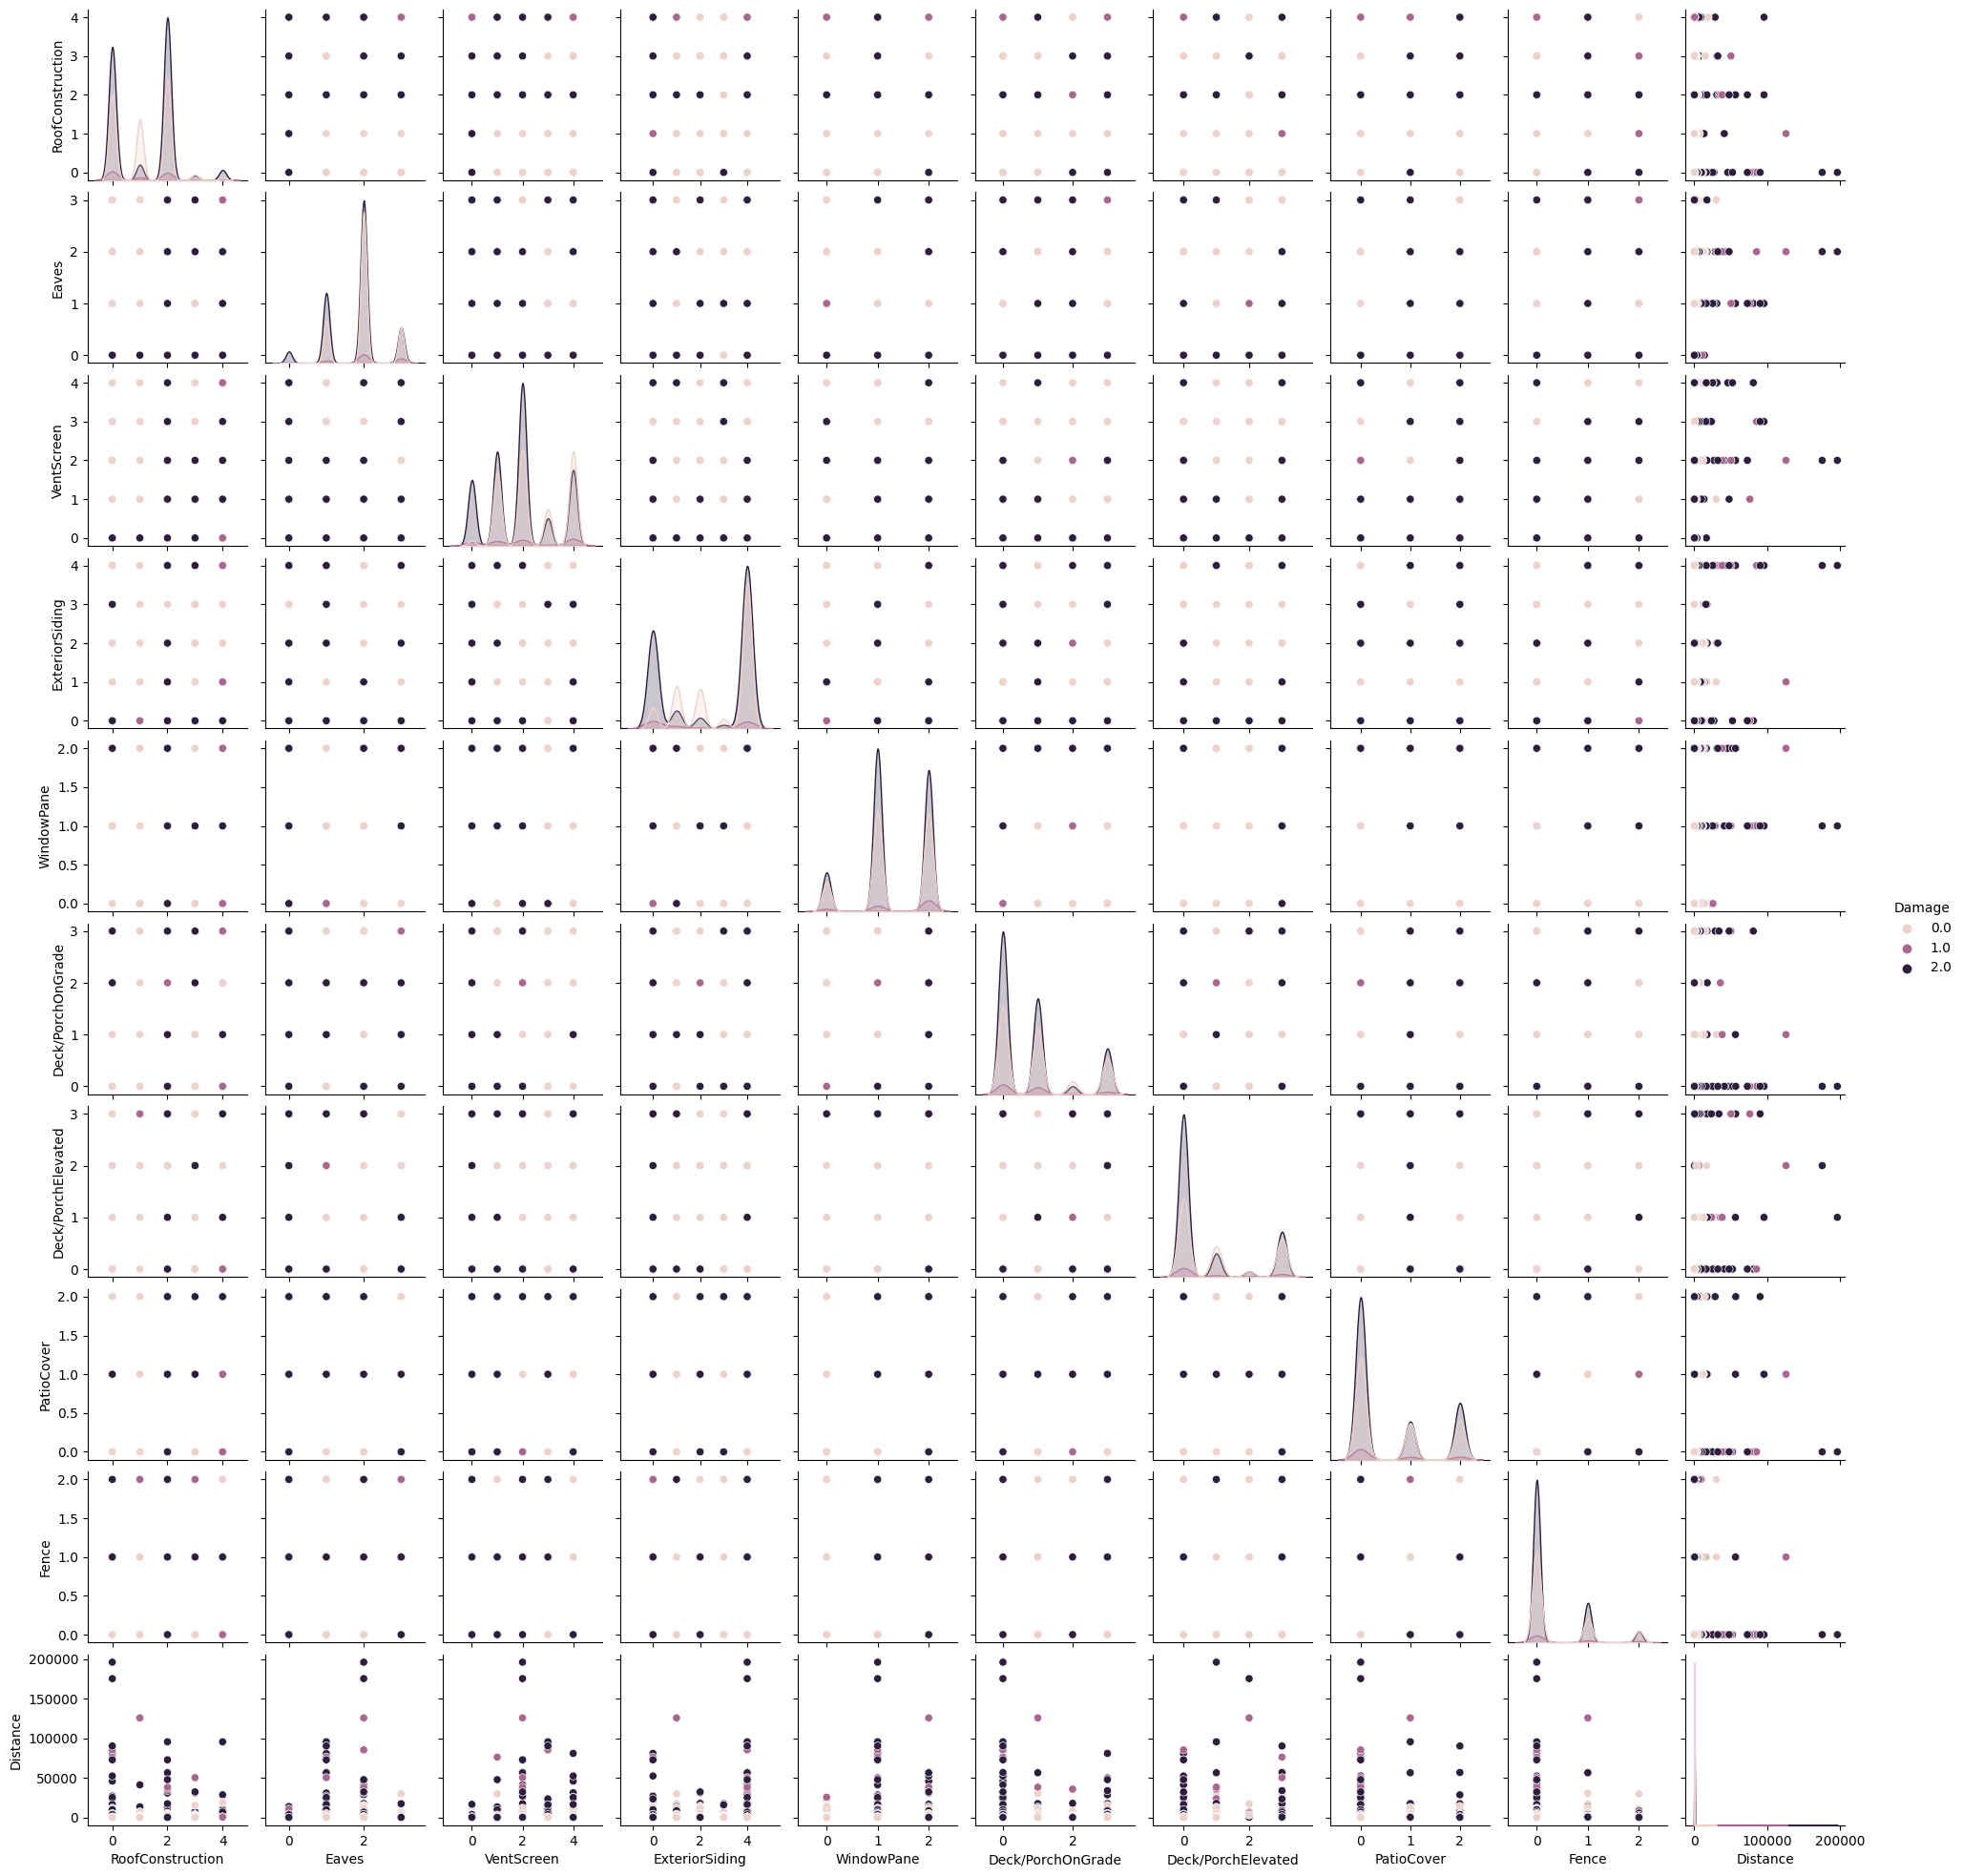

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the dataset
# 'columns' is the list of features you want to include in the joint PDF

# Data split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=123, stratify=y)

# Specify the columns to be used for training
selected_columns = ['RoofConstruction', 'Eaves', 'VentScreen', 'ExteriorSiding', 'WindowPane', 'Deck/PorchOnGrade', 'Deck/PorchElevated', 'PatioCover', 'Fence', 'Distance']

X_train = X_train[selected_columns]
X_test = X_test[selected_columns]

# Combine features and target variable in a single DataFrame
df_selected = pd.concat([X_train, y_train], axis=1)

# Create a pairplot with scatterplots and histograms
sns.pairplot(df_selected, hue='Damage', diag_kind='kde', height=2)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) th

<Figure size 1200x1000 with 0 Axes>

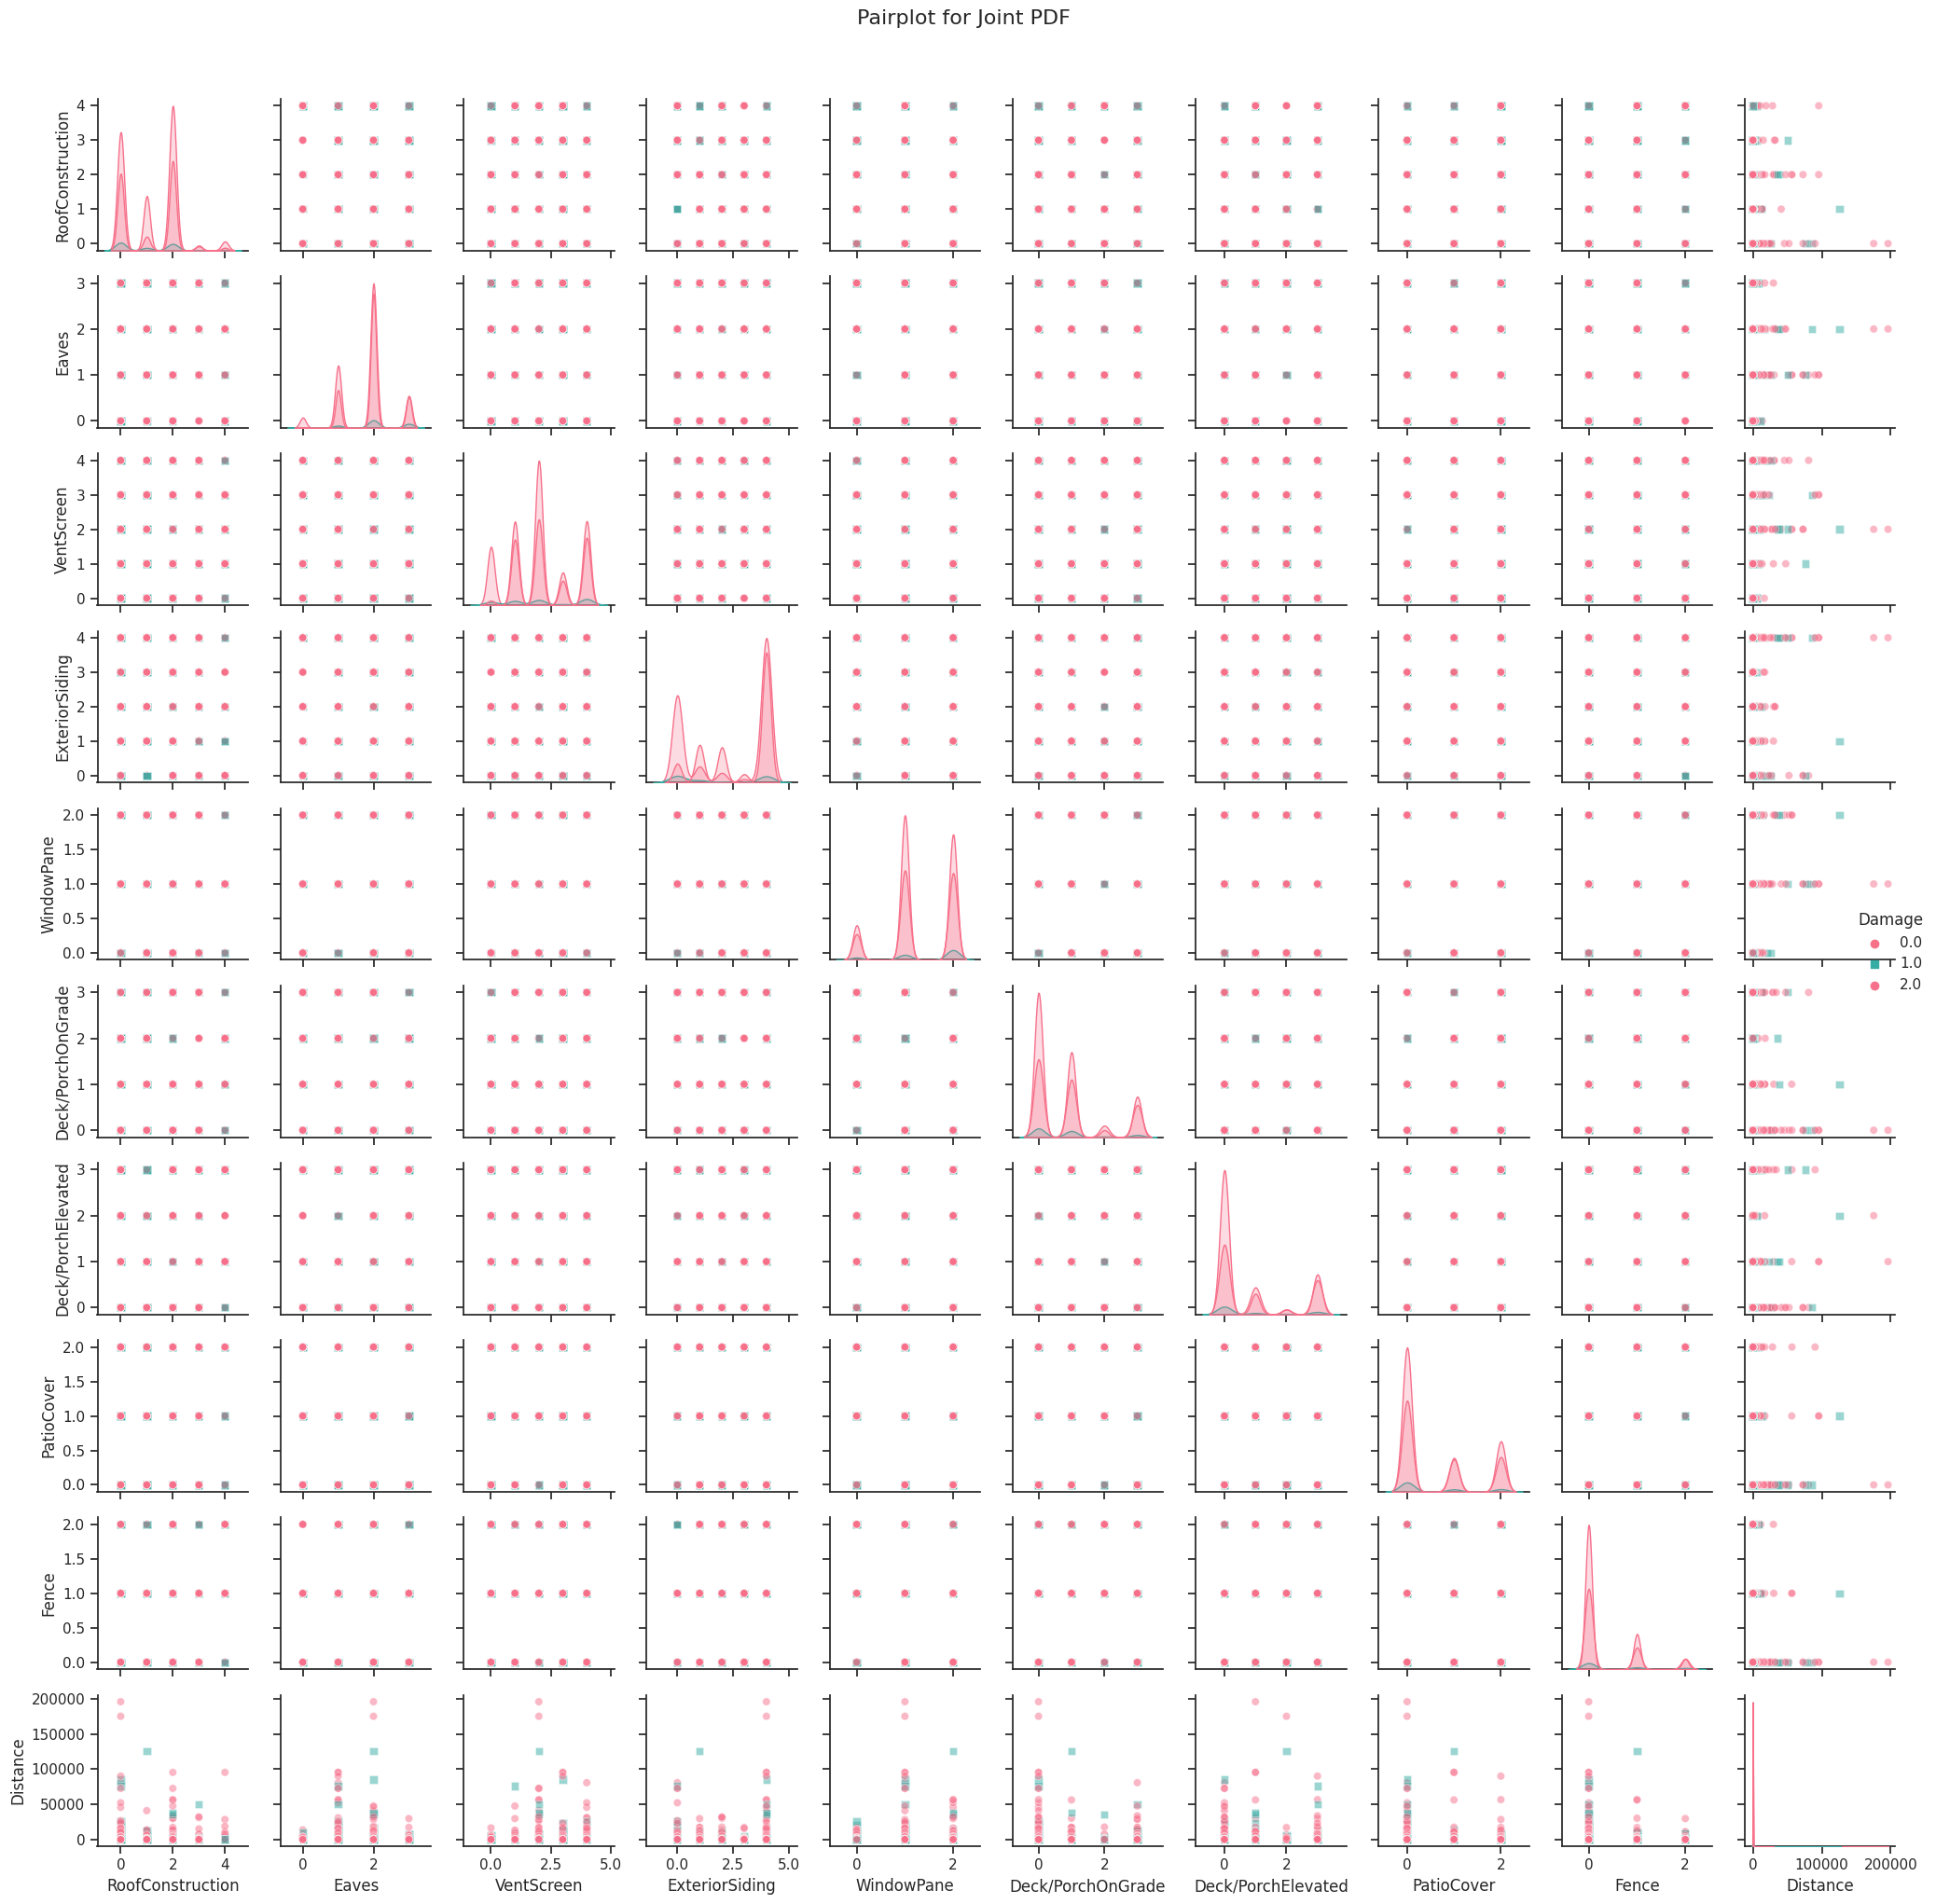

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Increase figure size and set style
plt.figure(figsize=(12, 10))
sns.set(style="ticks")

# Specify the columns to be used for training
selected_columns = ['RoofConstruction', 'Eaves', 'VentScreen', 'ExteriorSiding', 'WindowPane', 'Deck/PorchOnGrade', 'Deck/PorchElevated', 'PatioCover', 'Fence', 'Distance']

# Combine features and target variable in a single DataFrame
df_selected = pd.concat([X_train[selected_columns], y_train], axis=1)

# Create a pairplot with scatterplots and histograms
pairplot = sns.pairplot(df_selected, hue='Damage', diag_kind='kde', height=2, palette='husl', markers=["o", "s"], plot_kws={'alpha': 0.5})

# Set a title
pairplot.fig.suptitle("Pairplot for Joint PDF", y=1.02, fontsize=16)

# Adjust layout
plt.tight_layout()
plt.show()
